이커머스 고개들에 대한 데이터로 이탈을 예측하기 위한 분류문제이기 떄문에 분류모델을 이용

로지스틱, 랜덤포레스트, xgb, svm

* 로지스틱 회귀 (Logistic Regression):

특징: 이진 분류 문제에 주로 사용되며, 선형 결정 경계를 학습하는 알고리즘입니다. 확률 기반의 모델로, 로그 오즈를 사용하여 데이터가 특정 클래스에 속할 확률을 추정합니다.
효과적인 이유: 로지스틱 회귀는 선형 모델이지만 적절한 피처 엔지니어링과 조정을 통해 비선형 패턴도 잘 학습할 수 있습니다. 간단하면서도 해석 가능한 모델로, 특징과 이탈율 간의 관계를 설명하거나 예측에 활용할 수 있습니다.

* 랜덤 포레스트 (Random Forest):

특징: 결정 트리(Decision Tree)를 기반으로 하는 앙상블 학습 방법으로, 여러 개의 결정 트리를 생성하고 이들을 평균 또는 투표를 통해 결과를 종합하는 방식입니다.
효과적인 이유: 랜덤 포레스트는 다양한 피처와 샘플을 활용하여 과적합을 줄이는 데 효과적입니다. 이탈율 예측에서는 다양한 피처가 이탈 패턴을 잘 포착하도록 도와줍니다.

* XGBoost (Xtreme Gradient Boosting):

특징: 부스팅(Boosting) 알고리즘의 한 종류로, 여러 개의 약한 학습기(weak learner)를 결합하여 강력한 모델을 구축하는 방식입니다. 그레디언트 부스팅 기반의 알고리즘으로 성능이 뛰어나며, 트리 기반 모델입니다.
효과적인 이유: XGBoost는 균형 트리 분할과 잔차의 제곱 오차를 최소화하는 방식으로 모델을 학습하여, 이탈 패턴과 관련된 중요한 피처를 강조하고 예측에 활용할 수 있습니다.

* 서포트 벡터 머신 (Support Vector Machine, SVM):

특징: 선형 또는 비선형 분류 문제에 사용되며, 클래스 간의 가장 큰 간격을 가진 결정 경계를 찾는 것이 목표입니다. 커널 함수를 통해 비선형 문제도 다룰 수 있습니다.
효과적인 이유: SVM은 클래스 간 간격을 최대화하면서 과적합을 방지하는 경향이 있습니다. 이탈 패턴을 잘 구분할 수 있는 결정 경계를 찾아 이탈율 예측에 활용할 수 있습니다.

* 로지스틱 회귀 (Logistic Regression):

사용 이유: 이진 분류 문제에서 가장 간단하고 해석하기 쉬운 모델로, 이탈 여부를 예측할 때 많이 활용됩니다.

장점: 해석 가능하며, 기본적인 이탈 패턴을 파악하기에 적합합니다.

한계: 선형 경계를 가정하므로 비선형적인 패턴을 잡아내기 어려울 수 있습니다.

* 랜덤 포레스트 (Random Forest):

사용 이유: 다양한 피처의 상호작용을 고려하여 복잡한 이탈 패턴을 예측할 수 있습니다.

장점: 과적합을 줄이는 데 우수하며, 변수 중요도를 제공하여 피처 선택에 활용할 수 있습니다.

한계: 해석력이 상대적으로 떨어지며, 특정 피처의 중요도에 치우칠 수 있습니다.

* XGBoost (eXtreme Gradient Boosting):

사용 이유: 고차원 데이터와 불균형한 클래스를 다루는 데 효과적이며, 높은 예측 성능을 제공합니다.

장점: 과적합 방지와 예측 정확도 향상을 위해 그레이디언트 부스팅 알고리즘을 활용합니다.

한계: 하이퍼파라미터 튜닝이 필요하며, 해석력이 낮을 수 있습니다.

* SVC (Support Vector Classifier):

사용 이유: 데이터를 고차원 공간으로 매핑하여 복잡한 분류 문제를 해결할 수 있습니다.

장점: 커널 트릭을 활용하여 비선형 분류 문제를 다룰 수 있으며, 이탈 예측에 유용할 수 있습니다.

한계: 데이터의 크기가 크거나 클래스의 불균형이 있을 때 모델 성능이 저하될 수 있습니다.






In [1]:
pip install category_encoders

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 81.8/81.8 kB 1.8 MB/s eta 0:00:00


In [ ]:
pip install fastparquet

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.5/1.5 MB 7.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 17.0 MB/s eta 0:00:00


In [2]:
import numpy as np
import pandas as pd
import random
import datetime
import csv
from datetime import datetime

import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import explained_variance_score
import matplotlib.dates as mdates

from sklearn.pipeline import make_pipeline
from category_encoders import OrdinalEncoder
from sklearn.impute import SimpleImputer

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report


%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [3]:
# 구글 드라이브에서 파일 불러오기
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [4]:
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report, accuracy_score, recall_score, precision_score, f1_score
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

def get_roc_auc(model, X_val_encoded, y_val):
    if isinstance(model, XGBClassifier):
        y_pred_proba = model.predict_proba(
            X_val_encoded, iteration_range=(0, model.best_iteration)
        )[:, 1]
    else:
        y_pred_proba = model.predict_proba(X_val_encoded)[:, 1]

    ras = roc_auc_score(y_val, y_pred_proba)
    print(f"ROC-AUC: {ras:.5f}")

    baseline_fpr, baseline_tpr, _ = roc_curve(y_val, [0] * len(y_val))
    fpr, tpr, thresholds = roc_curve(y_val, y_pred_proba)
    tmp = pd.DataFrame({'fpr':fpr, 'tpr':tpr, 'thresholds': thresholds})
    plt.plot(baseline_fpr, baseline_tpr, linestyle="--", color="green", label="Baseline"
    )
    plt.plot(fpr, tpr, color="blue", label="Model")
    plt.scatter(fpr, tpr, color="red")
    plt.legend()
    plt.title("ROC curve")
    plt.xlabel("FPR")
    plt.ylabel("TPR")
    plt.show()
    return tmp

def summarize_results(model, X_val_encoded, y_val):
    # 1. Train / Val Loss Plot
    if isinstance(model, XGBClassifier):
        results = model.evals_result()
        tgts = results["validation_0"].keys()

        for tgt in tgts:
            train_error = results["validation_0"][tgt]
            val_error = results["validation_1"][tgt]

            plt.plot(train_error, label="Train")
            plt.plot(val_error, label="Validation")
            plt.ylabel(tgt)
            plt.xlabel("Model Complexity (n_estimators)")
            plt.legend()
            plt.show()
        print("best_iteration : ", model.best_iteration)

    # 2. Accuracy / Classification Report
    val_sc = model.score(X_val_encoded, y_val)
    print(f"검증 정확도 {val_sc:.5f}")

    if isinstance(model, XGBClassifier):
        y_pred = model.predict(X_val_encoded, iteration_range=(0, model.best_iteration))
    else:
        y_pred = model.predict(X_val_encoded)

    print(classification_report(y_val, y_pred))

    accuracy_xgb = accuracy_score(y_val, y_pred)
    precision_xgb = precision_score(y_val, y_pred)
    recall_xgb = recall_score(y_val, y_pred)
    f1_xgb = f1_score(y_val, y_pred)

    print(f'accuracy(정확도) is {accuracy_xgb:.5f}')
    print(f'precision(정밀도) is {precision_xgb:.5f}')
    print(f'recall(재현율) is {recall_xgb:.5f}')
    print(f'f1점수(F1 score)is {f1_xgb:.5f}')
    print('\n')

    # 3. ROC-AUC
    get_roc_auc(model, X_val_encoded, y_val)

    # 4. Confusion Matrix
    cm = confusion_matrix(y_val, y_pred, labels=model.classes_)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=model.classes_)
    disp.plot()
    plt.title(f"Confusion Matrix (n = {len(y_val)})", fontsize=15)
    plt.show()
    #ConfusionMatrixDisplay.from_estimator(model, X_val_encoded, y_val,cmap='Blues')
    #plt.show()

In [5]:
# 변수 중요도 plot
def plot_feature_importance(importance, names, topn = 'all'):

    # 변수 중요도와 변수 이름을 정렬해서 df로 저장
    feature_importance = np.array(importance)
    feature_names = np.array(names)

    data={'feature_names':feature_names,'feature_importance':feature_importance}
    fi_temp = pd.DataFrame(data)

    fi_temp.sort_values(by=['feature_importance'], ascending=False,inplace=True)
    fi_temp.reset_index(drop=True, inplace = True)

    # 변수가 너무 많으면 보기 어려우니, top N 지정
    if topn == 'all' :
        fi_df = fi_temp.copy()
    else :
        fi_df = fi_temp.iloc[:topn]

    # 그래프 그리기
    plt.figure(figsize=(10,8))
    sns.barplot(x='feature_importance', y='feature_names', data = fi_df)
    plt.xlabel('importance')
    plt.ylabel('feature names')
    plt.grid()

    # 저장한 변수 중요도 df 반환
    return fi_df

랭크	R	F	M

5	90일 이내	20회 이상	5000달러 이상

4	180일 이내	13회 이상	2000달러 이상

3	365일 이내	7회 이상	800달러 이상

2	730일 이내	2회 이상	300달러 이상

1	730일 이상	1회 이상	300달러 미만

위의 기준으로 점수를 매김

* 데이터 불러오기

In [ ]:
rfm_df = pd.read_csv('/content/gdrive/MyDrive/Sprint/Section6_Project2/rfm_df.csv')

In [ ]:
rfm_df.Rank.value_counts()

regular            14436
churn_customer     13357
stable_customer    10893
churn_precursor     7561
new_customer        4457
Name: Rank, dtype: int64

In [6]:
df_customer_churn = pd.read_csv('/content/gdrive/MyDrive/Sprint/Section6_Project2/df_customer_churn.csv')

In [8]:
df_customer_churn.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 23 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   customer_id         100000 non-null  int64  
 1   first_name          100000 non-null  object 
 2   last_name           100000 non-null  object 
 3   username            100000 non-null  object 
 4   email               100000 non-null  object 
 5   gender              100000 non-null  object 
 6   device_type         100000 non-null  object 
 7   device_id           100000 non-null  object 
 8   device_version      100000 non-null  object 
 9   home_location_lat   100000 non-null  float64
 10  home_location_long  100000 non-null  float64
 11  home_location       100000 non-null  object 
 12  first_join_date     100000 non-null  object 
 13  age                 100000 non-null  int64  
 14  click_date          50704 non-null   object 
 15  Recency             100000 non-null

In [7]:
df_customer_churn.Rank.value_counts()

churn_customer     62653
regular            14436
stable_customer    10893
churn_precursor     7561
new_customer        4457
Name: Rank, dtype: int64

In [10]:
df_customer_churn.churn.value_counts()

1    62653
0    37347
Name: churn, dtype: int64

In [69]:
df_product = pd.read_csv('/content/gdrive/MyDrive/Sprint/Section6_Project2/product.csv', on_bad_lines='skip')

In [9]:
df_product.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44424 entries, 0 to 44423
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   id                  44424 non-null  int64  
 1   gender              44424 non-null  object 
 2   masterCategory      44424 non-null  object 
 3   subCategory         44424 non-null  object 
 4   articleType         44424 non-null  object 
 5   baseColour          44409 non-null  object 
 6   season              44403 non-null  object 
 7   year                44423 non-null  float64
 8   usage               44107 non-null  object 
 9   productDisplayName  44417 non-null  object 
dtypes: float64(1), int64(1), object(8)
memory usage: 3.4+ MB


In [70]:
df_product.rename(columns={'id': 'product_id'}, inplace=True)
df_product.drop(columns=['gender'], inplace=True)

In [7]:
df_transaction_new = pd.read_csv('/content/gdrive/MyDrive/Sprint/Section6_Project2/transaction_new.csv')

In [12]:
df_transaction_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1254585 entries, 0 to 1254584
Data columns (total 16 columns):
 #   Column                  Non-Null Count    Dtype  
---  ------                  --------------    -----  
 0   created_at              1254585 non-null  object 
 1   customer_id             1254585 non-null  int64  
 2   booking_id              1254585 non-null  object 
 3   session_id              1254585 non-null  object 
 4   payment_method          1254585 non-null  object 
 5   payment_status          1254585 non-null  object 
 6   promo_amount            1254585 non-null  int64  
 7   promo_code              481139 non-null   object 
 8   shipment_fee            1254585 non-null  int64  
 9   shipment_date_limit     1254585 non-null  object 
 10  shipment_location_lat   1254585 non-null  float64
 11  shipment_location_long  1254585 non-null  float64
 12  total_amount            1254585 non-null  int64  
 13  product_id              1254585 non-null  int64  
 14  qu

In [14]:
merged_df = df_customer_churn.merge(df_transaction_new, on='customer_id', how='left')

In [71]:
# customer_id를 기준으로 데이터 합치기
df_ct_merged = merged_df.merge(df_product, on='product_id', how='left')

In [16]:
df_ct_merged.churn.value_counts()

0    1218797
1      85083
Name: churn, dtype: int64

In [72]:
data = df_ct_merged.copy()

In [73]:
columns_to_drop = ['device_id', 'email', 'first_name', 'last_name', 'username', 'Recency_Score', 'Frequency_Score', 'Monetary_Score', 'Rank', 'click_date', 'Recency',	'Frequency',	'Monetary']
data.drop(columns=columns_to_drop, inplace=True)

In [74]:
# created_at 칼럼을 연, 월, 일로 분리하여 새로운 칼럼 추가
data['created_at_year'] = pd.to_datetime(data['created_at']).dt.year
data['created_at_month'] = pd.to_datetime(data['created_at']).dt.month
data['created_at_day'] = pd.to_datetime(data['created_at']).dt.day

# shipment_date_limit 칼럼을 연, 월, 일로 분리하여 새로운 칼럼 추가
data['shipment_date_limit_year'] = pd.to_datetime(data['shipment_date_limit']).dt.year
data['shipment_date_limit_month'] = pd.to_datetime(data['shipment_date_limit']).dt.month
data['shipment_date_limit_day'] = pd.to_datetime(data['shipment_date_limit']).dt.day

# first_join_date 칼럼을 연, 월, 일로 분리하여 새로운 칼럼 추가
data['first_join_date_year'] = pd.to_datetime(data['first_join_date']).dt.year
data['first_join_date_month'] = pd.to_datetime(data['first_join_date']).dt.month
data['first_join_date_day'] = pd.to_datetime(data['first_join_date']).dt.day

# 기존 칼럼 drop
data.drop(['created_at', 'shipment_date_limit', 'first_join_date'], axis=1, inplace=True)

In [20]:
data.churn.value_counts()

0    1218797
1      85083
Name: churn, dtype: int64

In [21]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1303880 entries, 0 to 1303879
Data columns (total 39 columns):
 #   Column                     Non-Null Count    Dtype  
---  ------                     --------------    -----  
 0   customer_id                1303880 non-null  int64  
 1   gender                     1303880 non-null  object 
 2   device_type                1303880 non-null  object 
 3   device_version             1303880 non-null  object 
 4   home_location_lat          1303880 non-null  float64
 5   home_location_long         1303880 non-null  float64
 6   home_location              1303880 non-null  object 
 7   age                        1303880 non-null  int64  
 8   churn                      1303880 non-null  int64  
 9   booking_id                 1254585 non-null  object 
 10  session_id                 1254585 non-null  object 
 11  payment_method             1254585 non-null  object 
 12  payment_status             1254585 non-null  object 
 13  promo_amount

In [75]:
# 이탈고객 1, 이탈하지 않았으면 0
target = 'churn'
X = data.drop(target, axis=1)
y = data[target]
features = X.columns

In [76]:
# 75:25로 분리
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42, stratify=y)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.25, random_state=42, stratify=y_train)

* LogisticRegression

* StandardScaler 미사용

In [24]:
Logistic_pipe1 = make_pipeline(
    OrdinalEncoder(),
    SimpleImputer(strategy="median"),
    LogisticRegression(
        penalty='l2',
        dual=False,
        tol=0.0001,
        C=1.0,
        fit_intercept=True,
        intercept_scaling=1,
        class_weight='balanced',
        random_state=None,
        solver='lbfgs',
        max_iter=100,
        multi_class='auto',
        verbose=0,
        warm_start=False,
        n_jobs=None,
        l1_ratio=None
    ),
)

In [25]:
Logistic_pipe1.fit(X_train, y_train)

Pipeline(steps=[('ordinalencoder',
                 OrdinalEncoder(cols=['gender', 'device_type', 'device_version',
                                      'home_location', 'booking_id',
                                      'session_id', 'payment_method',
                                      'payment_status', 'promo_code',
                                      'masterCategory', 'subCategory',
                                      'articleType', 'baseColour', 'season',
                                      'usage', 'productDisplayName'],
                                mapping=[{'col': 'gender',
                                          'data_type': dtype('O'),
                                          'mapping': M      1
F      2
NaN   -2
dt...
Baggit Women Black Ishqiya Taj Handbag                    4
4711 Kolnisch Wasser Men Perfume                          5
                                                      ...  
Deborah Terracotta HiTech Blusher # 52                31118
Streetwear Satin Smooth Violet Vapours Lipstick 12    31119
FCUK Underwear Men Black Printed Brief                31120
Coolers Men Brown Pokar Flip Flops                    31121
NaN                                                   31122
Length: 31122, dtype: int64}])),
                ('simpleimputer', SimpleImputer(strategy='median')),
                ('logisticregression',
                 LogisticRegression(class_weight='balanced'))])

검증 정확도 0.87124
              precision    recall  f1-score   support

           0       0.97      0.89      0.93    228525
           1       0.28      0.63      0.39     15953

    accuracy                           0.87    244478
   macro avg       0.63      0.76      0.66    244478
weighted avg       0.93      0.87      0.89    244478

accuracy(정확도) is 0.87124
precision(정밀도) is 0.28184
recall(재현율) is 0.62866
f1점수(F1 score)is 0.38920


ROC-AUC: 0.78762


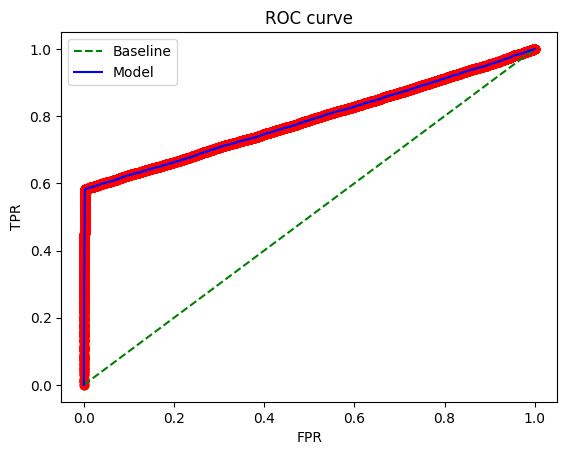

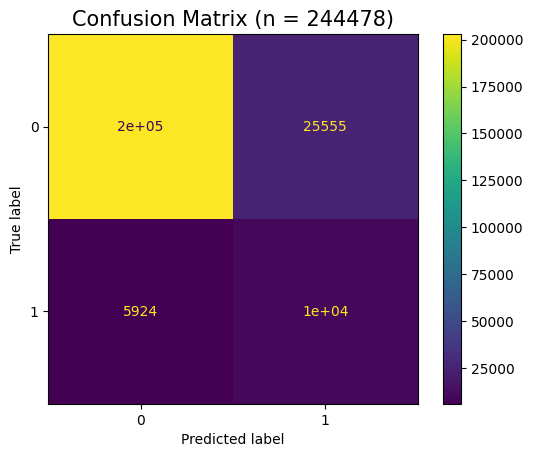

In [73]:
summarize_results(Logistic_pipe1, X_val, y_val)

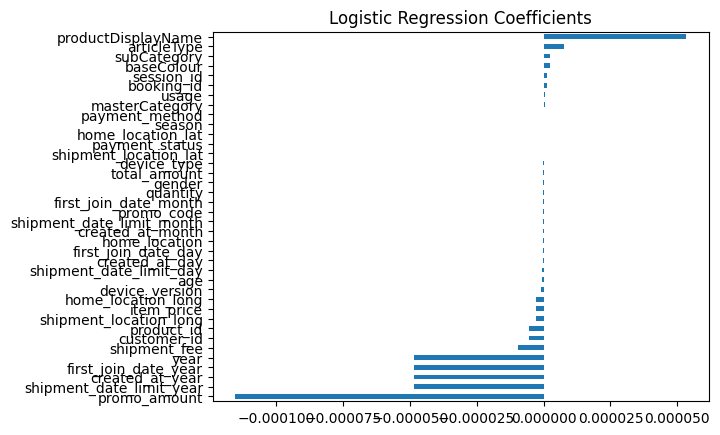

In [58]:
# 로지스틱 회귀 모델 추출
logistic_model = Logistic_pipe1.named_steps['logisticregression']

# 각 피처의 계수 추출
coefficients = logistic_model.coef_[0]

# 피처 이름과 계수를 매칭하여 Series 생성
importances = pd.Series(coefficients, index=X_train.columns)

# 피처 중요도 시각화
importances.sort_values().plot(kind='barh')
plt.title("Logistic Regression Coefficients")
plt.show()

미사용의 경우 학습이 거의 안되는 것을 볼 수 있다.

* StandardScaler 사용, class_weight='balanced' 미사용

In [28]:
Logistic_pipe2 = make_pipeline(
    OrdinalEncoder(),
    SimpleImputer(strategy="median"),
    StandardScaler(),
    LogisticRegression(
        penalty='l2',
        dual=False,
        tol=0.0001,
        C=1.0,
        fit_intercept=True,
        intercept_scaling=1,
        #class_weight='balanced',
        random_state=None,
        solver='lbfgs',
        max_iter=100,
        multi_class='auto',
        verbose=0,
        warm_start=False,
        n_jobs=None,
        l1_ratio=None
    ),
)

In [29]:
Logistic_pipe2.fit(X_train, y_train)

Pipeline(steps=[('ordinalencoder',
                 OrdinalEncoder(cols=['gender', 'device_type', 'device_version',
                                      'home_location', 'booking_id',
                                      'session_id', 'payment_method',
                                      'payment_status', 'promo_code',
                                      'masterCategory', 'subCategory',
                                      'articleType', 'baseColour', 'season',
                                      'usage', 'productDisplayName'],
                                mapping=[{'col': 'gender',
                                          'data_type': dtype('O'),
                                          'mapping': M      1
F      2
NaN   -2
dt...
4711 Kolnisch Wasser Men Perfume                          5
                                                      ...  
Deborah Terracotta HiTech Blusher # 52                31118
Streetwear Satin Smooth Violet Vapours Lipstick 12    31119
FCUK Underwear Men Black Printed Brief                31120
Coolers Men Brown Pokar Flip Flops                    31121
NaN                                                   31122
Length: 31122, dtype: int64}])),
                ('simpleimputer', SimpleImputer(strategy='median')),
                ('standardscaler', StandardScaler()),
                ('logisticregression', LogisticRegression())])

검증 정확도 0.97239
              precision    recall  f1-score   support

           0       0.97      1.00      0.99    228525
           1       0.99      0.58      0.73     15953

    accuracy                           0.97    244478
   macro avg       0.98      0.79      0.86    244478
weighted avg       0.97      0.97      0.97    244478

accuracy(정확도) is 0.97239
precision(정밀도) is 0.99104
recall(재현율) is 0.58221
f1점수(F1 score)is 0.73350


ROC-AUC: 0.87383


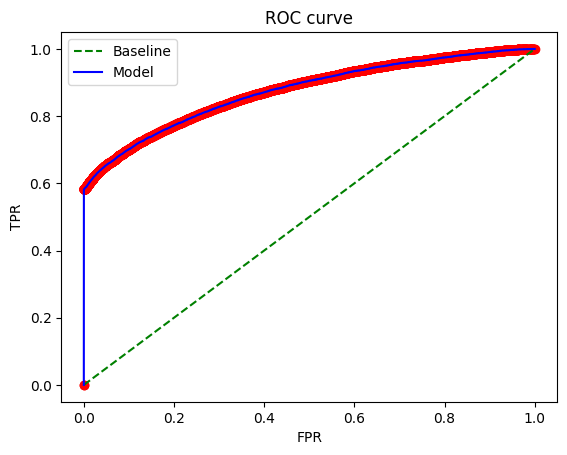

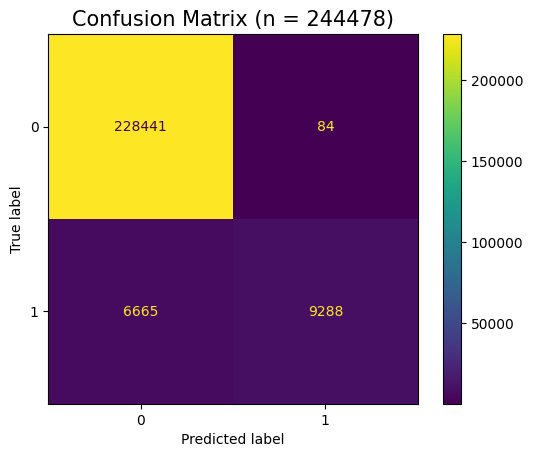

In [74]:
summarize_results(Logistic_pipe2, X_val, y_val)

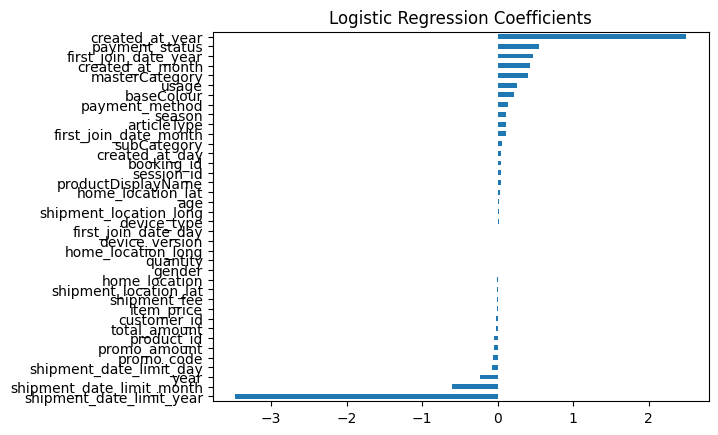

In [31]:
# 로지스틱 회귀 모델 추출
logistic_model = Logistic_pipe2.named_steps['logisticregression']

# 각 피처의 계수 추출
coefficients = logistic_model.coef_[0]

# 피처 이름과 계수를 매칭하여 Series 생성
importances = pd.Series(coefficients, index=X_train.columns)

# 피처 중요도 시각화
importances.sort_values().plot(kind='barh')
plt.title("Logistic Regression Coefficients")
plt.show()

* StandardScaler 사용, class_weight='balanced' 사용

In [32]:
Logistic_pipe3 = make_pipeline(
    OrdinalEncoder(),
    SimpleImputer(strategy="median"),
    StandardScaler(),
    LogisticRegression(
        penalty='l2',
        dual=False,
        tol=0.0001,
        C=1.0,
        fit_intercept=True,
        intercept_scaling=1,
        class_weight='balanced',
        random_state=None,
        solver='lbfgs',
        max_iter=100,
        multi_class='auto',
        verbose=0,
        warm_start=False,
        n_jobs=None,
        l1_ratio=None
    ),
)

In [33]:
Logistic_pipe3.fit(X_train, y_train)

Pipeline(steps=[('ordinalencoder',
                 OrdinalEncoder(cols=['gender', 'device_type', 'device_version',
                                      'home_location', 'booking_id',
                                      'session_id', 'payment_method',
                                      'payment_status', 'promo_code',
                                      'masterCategory', 'subCategory',
                                      'articleType', 'baseColour', 'season',
                                      'usage', 'productDisplayName'],
                                mapping=[{'col': 'gender',
                                          'data_type': dtype('O'),
                                          'mapping': M      1
F      2
NaN   -2
dt...
Deborah Terracotta HiTech Blusher # 52                31118
Streetwear Satin Smooth Violet Vapours Lipstick 12    31119
FCUK Underwear Men Black Printed Brief                31120
Coolers Men Brown Pokar Flip Flops                    31121
NaN                                                   31122
Length: 31122, dtype: int64}])),
                ('simpleimputer', SimpleImputer(strategy='median')),
                ('standardscaler', StandardScaler()),
                ('logisticregression',
                 LogisticRegression(class_weight='balanced'))])

검증 정확도 0.88599
              precision    recall  f1-score   support

           0       0.98      0.90      0.94    228525
           1       0.33      0.70      0.45     15953

    accuracy                           0.89    244478
   macro avg       0.65      0.80      0.69    244478
weighted avg       0.93      0.89      0.90    244478

accuracy(정확도) is 0.88599
precision(정밀도) is 0.32653
recall(재현율) is 0.70319
f1점수(F1 score)is 0.44597


ROC-AUC: 0.87989


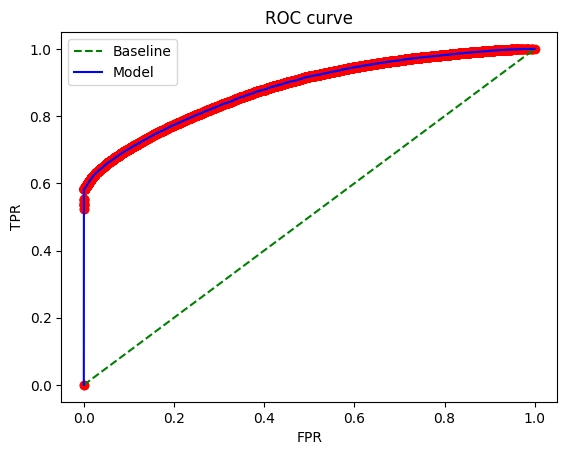

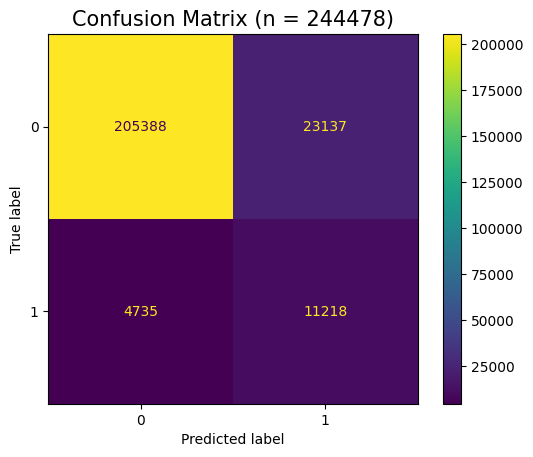

In [75]:
summarize_results(Logistic_pipe3, X_val, y_val)

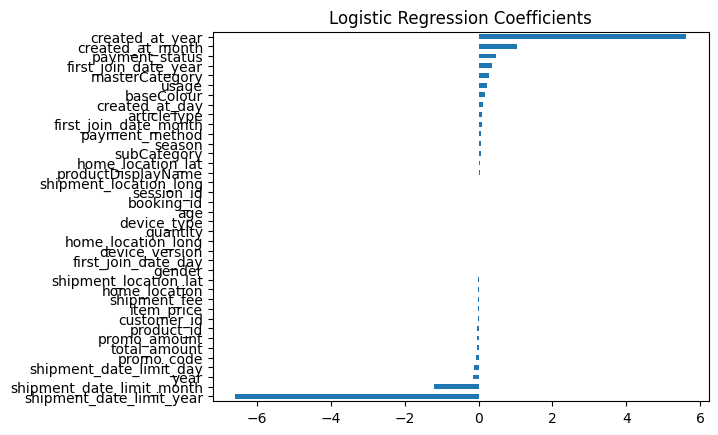

In [35]:
# 로지스틱 회귀 모델 추출
logistic_model = Logistic_pipe3.named_steps['logisticregression']

# 각 피처의 계수 추출
coefficients = logistic_model.coef_[0]

# 피처 이름과 계수를 매칭하여 Series 생성
importances = pd.Series(coefficients, index=X_train.columns)

# 피처 중요도 시각화
importances.sort_values().plot(kind='barh')
plt.title("Logistic Regression Coefficients")
plt.show()

* 랜덤포레스트

* StandardScaler 미사용

In [23]:
RandomForest_pipe1 = make_pipeline(
    OrdinalEncoder(),
    SimpleImputer(strategy="median"),
    #StandardScaler(),
    RandomForestClassifier(
        n_estimators=100,
        criterion='gini',
        max_depth=5,
        min_samples_split=2,
        min_samples_leaf=1,
        min_weight_fraction_leaf=0.0,
        max_features='sqrt',
        max_leaf_nodes=None,
        min_impurity_decrease=0.0,
        bootstrap=True,
        oob_score=False,
        n_jobs=None,
        random_state=None,
        verbose=0,
        warm_start=False,
        #class_weight='balanced',
        ccp_alpha=0.0,
        max_samples=None),
)

In [24]:
RandomForest_pipe1.fit(X_train, y_train)

Pipeline(steps=[('ordinalencoder',
                 OrdinalEncoder(cols=['gender', 'device_type', 'device_version',
                                      'home_location', 'booking_id',
                                      'session_id', 'payment_method',
                                      'payment_status', 'promo_code',
                                      'masterCategory', 'subCategory',
                                      'articleType', 'baseColour', 'season',
                                      'usage', 'productDisplayName'],
                                mapping=[{'col': 'gender',
                                          'data_type': dtype('O'),
                                          'mapping': M      1
F      2
NaN   -2
dt...
Baggit Women Black Ishqiya Taj Handbag                    4
4711 Kolnisch Wasser Men Perfume                          5
                                                      ...  
Deborah Terracotta HiTech Blusher # 52                31118
Streetwear Satin Smooth Violet Vapours Lipstick 12    31119
FCUK Underwear Men Black Printed Brief                31120
Coolers Men Brown Pokar Flip Flops                    31121
NaN                                                   31122
Length: 31122, dtype: int64}])),
                ('simpleimputer', SimpleImputer(strategy='median')),
                ('randomforestclassifier',
                 RandomForestClassifier(max_depth=5))])

검증 정확도 0.97271
              precision    recall  f1-score   support

           0       0.97      1.00      0.99    228525
           1       1.00      0.58      0.74     15953

    accuracy                           0.97    244478
   macro avg       0.99      0.79      0.86    244478
weighted avg       0.97      0.97      0.97    244478

accuracy(정확도) is 0.97271
precision(정밀도) is 1.00000
recall(재현율) is 0.58177
f1점수(F1 score)is 0.73559


ROC-AUC: 0.89842


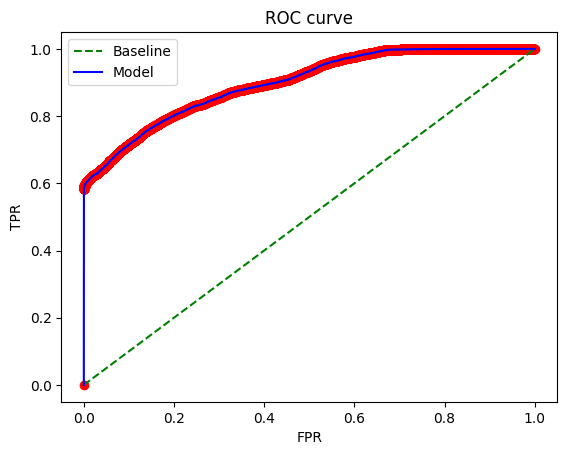

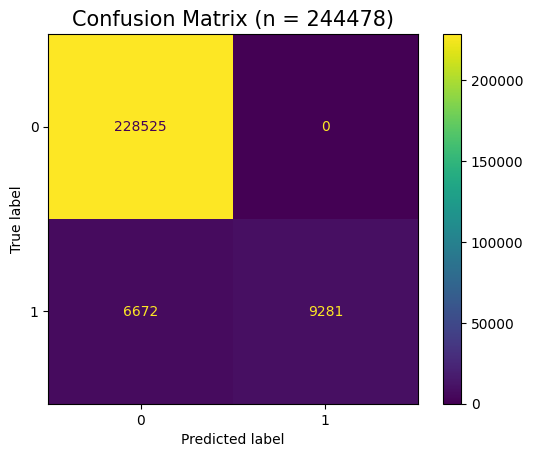

In [25]:
summarize_results(RandomForest_pipe1, X_val, y_val)

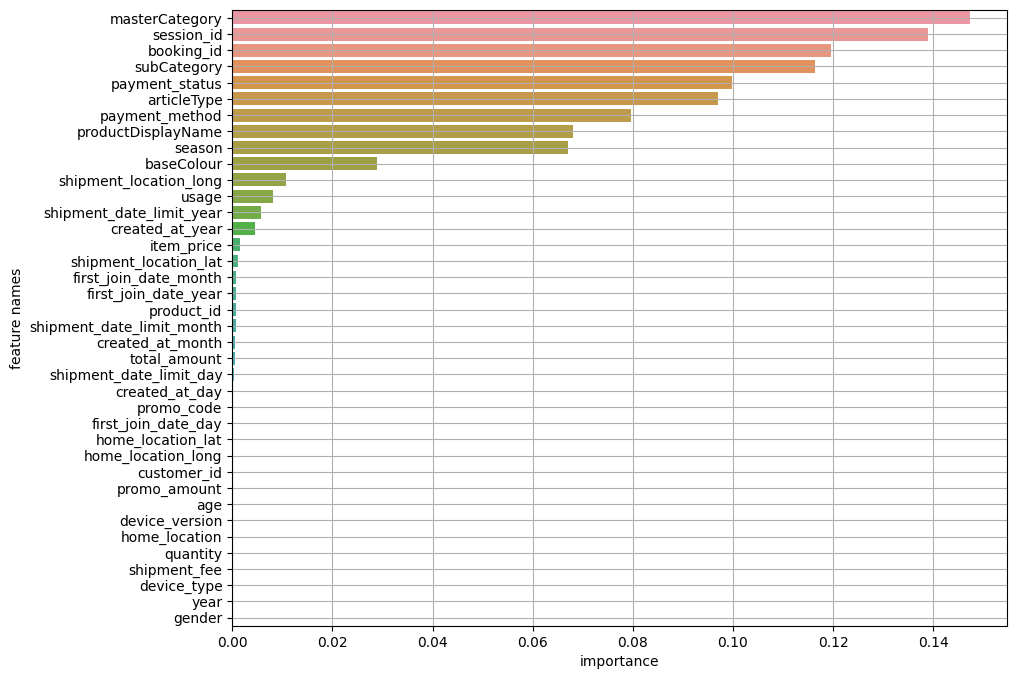

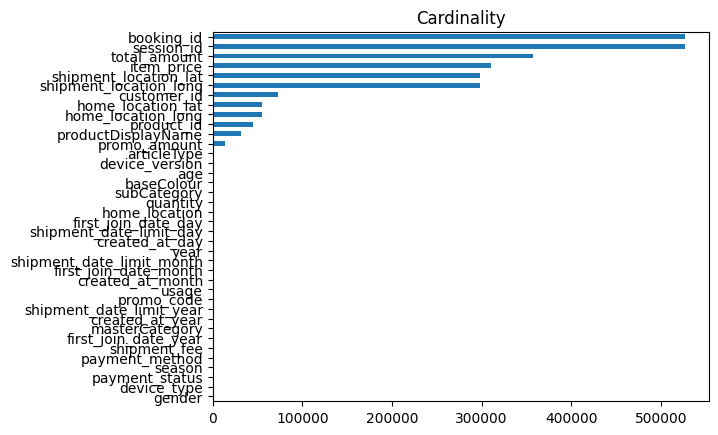

In [26]:
# randomforest 모델 추출
randomforest_model = RandomForest_pipe1.named_steps['randomforestclassifier']

# 특성 중요도 계산
importances = pd.Series(randomforest_model.feature_importances_, X_train.columns)

# 특성 중요도 시각화
fi = plot_feature_importance(randomforest_model.feature_importances_, list(X_train))
plt.show()

# 특성의 고유값 개수 시각화
X_train.nunique().sort_values().plot.barh()
plt.title("Cardinality")
plt.show()

* StandardScaler 사용, class_weight='balanced' 미사용

In [27]:
RandomForest_pipe2 = make_pipeline(
    OrdinalEncoder(),
    SimpleImputer(strategy="median"),
    StandardScaler(),
    RandomForestClassifier(
        n_estimators=100,
        criterion='gini',
        max_depth=5,
        min_samples_split=2,
        min_samples_leaf=1,
        min_weight_fraction_leaf=0.0,
        max_features='sqrt',
        max_leaf_nodes=None,
        min_impurity_decrease=0.0,
        bootstrap=True,
        oob_score=False,
        n_jobs=None,
        random_state=None,
        verbose=0,
        warm_start=False,
        #class_weight='balanced',
        ccp_alpha=0.0,
        max_samples=None),
)

In [28]:
RandomForest_pipe2.fit(X_train, y_train)

Pipeline(steps=[('ordinalencoder',
                 OrdinalEncoder(cols=['gender', 'device_type', 'device_version',
                                      'home_location', 'booking_id',
                                      'session_id', 'payment_method',
                                      'payment_status', 'promo_code',
                                      'masterCategory', 'subCategory',
                                      'articleType', 'baseColour', 'season',
                                      'usage', 'productDisplayName'],
                                mapping=[{'col': 'gender',
                                          'data_type': dtype('O'),
                                          'mapping': M      1
F      2
NaN   -2
dt...
                                                      ...  
Deborah Terracotta HiTech Blusher # 52                31118
Streetwear Satin Smooth Violet Vapours Lipstick 12    31119
FCUK Underwear Men Black Printed Brief                31120
Coolers Men Brown Pokar Flip Flops                    31121
NaN                                                   31122
Length: 31122, dtype: int64}])),
                ('simpleimputer', SimpleImputer(strategy='median')),
                ('standardscaler', StandardScaler()),
                ('randomforestclassifier',
                 RandomForestClassifier(max_depth=5))])

검증 정확도 0.97271
              precision    recall  f1-score   support

           0       0.97      1.00      0.99    228525
           1       1.00      0.58      0.74     15953

    accuracy                           0.97    244478
   macro avg       0.99      0.79      0.86    244478
weighted avg       0.97      0.97      0.97    244478

accuracy(정확도) is 0.97271
precision(정밀도) is 1.00000
recall(재현율) is 0.58177
f1점수(F1 score)is 0.73559


ROC-AUC: 0.90085


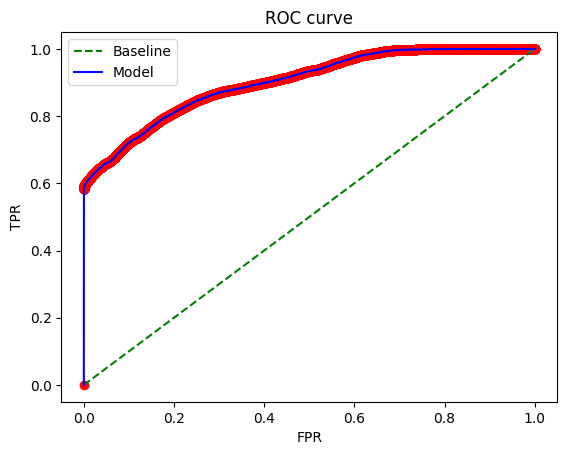

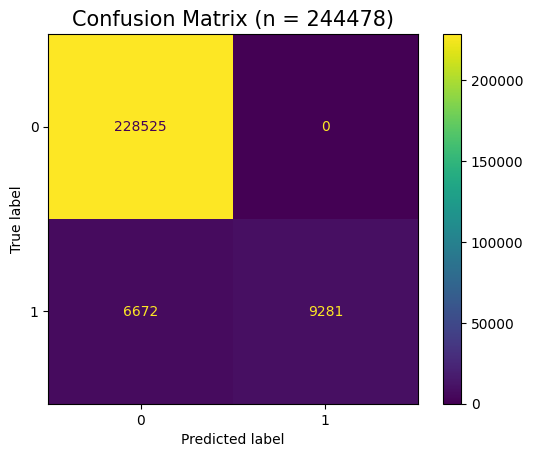

In [29]:
summarize_results(RandomForest_pipe2, X_val, y_val)

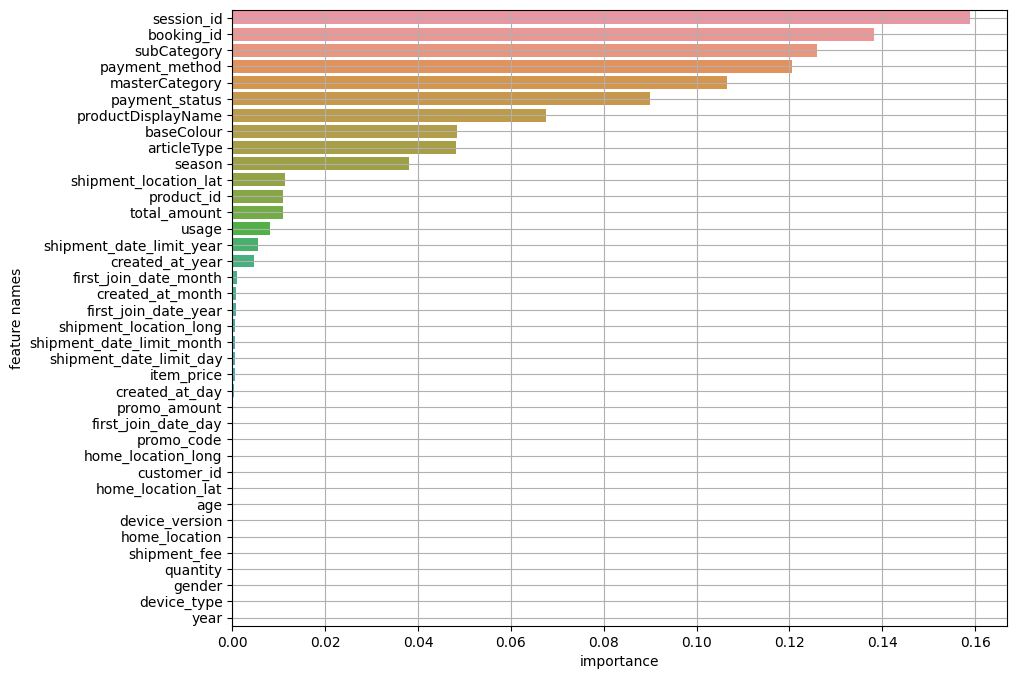

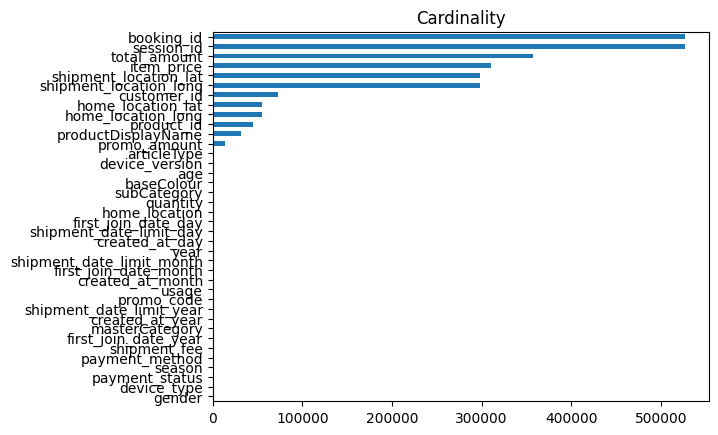

In [30]:
# randomforest 모델 추출
randomforest_model = RandomForest_pipe2.named_steps['randomforestclassifier']

# 특성 중요도 계산
importances = pd.Series(randomforest_model.feature_importances_, X_train.columns)

# 특성 중요도 시각화
fi = plot_feature_importance(randomforest_model.feature_importances_, list(X_train))
plt.show()

# 특성의 고유값 개수 시각화
X_train.nunique().sort_values().plot.barh()
plt.title("Cardinality")
plt.show()

* StandardScaler 사용, class_weight='balanced' 사용

In [77]:
RandomForest_pipe3 = make_pipeline(
    OrdinalEncoder(),
    SimpleImputer(strategy="median"),
    StandardScaler(),
    RandomForestClassifier(
        n_estimators=200,
        max_depth=7,
        min_samples_split=2,
        min_samples_leaf=1,
        max_features='sqrt',
        class_weight='balanced',
        ),
)

In [78]:
RandomForest_pipe3.fit(X_train, y_train)

Pipeline(steps=[('ordinalencoder',
                 OrdinalEncoder(cols=['gender', 'device_type', 'device_version',
                                      'home_location', 'booking_id',
                                      'session_id', 'payment_method',
                                      'payment_status', 'promo_code',
                                      'masterCategory', 'subCategory',
                                      'articleType', 'baseColour', 'season',
                                      'usage', 'productDisplayName'],
                                mapping=[{'col': 'gender',
                                          'data_type': dtype('O'),
                                          'mapping': M      1
F      2
NaN   -2
dt...
Streetwear Satin Smooth Violet Vapours Lipstick 12    31119
FCUK Underwear Men Black Printed Brief                31120
Coolers Men Brown Pokar Flip Flops                    31121
NaN                                                   31122
Length: 31122, dtype: int64}])),
                ('simpleimputer', SimpleImputer(strategy='median')),
                ('standardscaler', StandardScaler()),
                ('randomforestclassifier',
                 RandomForestClassifier(class_weight='balanced', max_depth=7,
                                        n_estimators=200))])

검증 정확도 0.96704
              precision    recall  f1-score   support

           0       0.97      0.99      0.98    228525
           1       0.82      0.63      0.71     15953

    accuracy                           0.97    244478
   macro avg       0.90      0.81      0.85    244478
weighted avg       0.96      0.97      0.96    244478

accuracy(정확도) is 0.96704
precision(정밀도) is 0.82366
recall(재현율) is 0.62979
f1점수(F1 score)is 0.71379


ROC-AUC: 0.91983


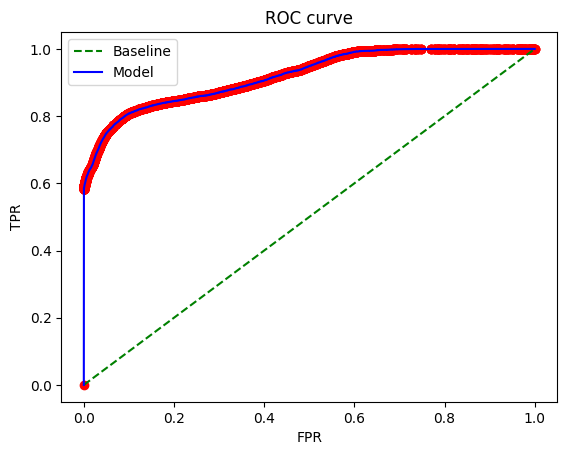

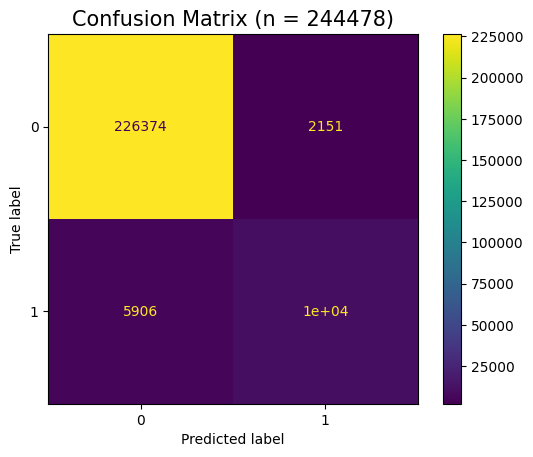

In [79]:
summarize_results(RandomForest_pipe3, X_val, y_val)

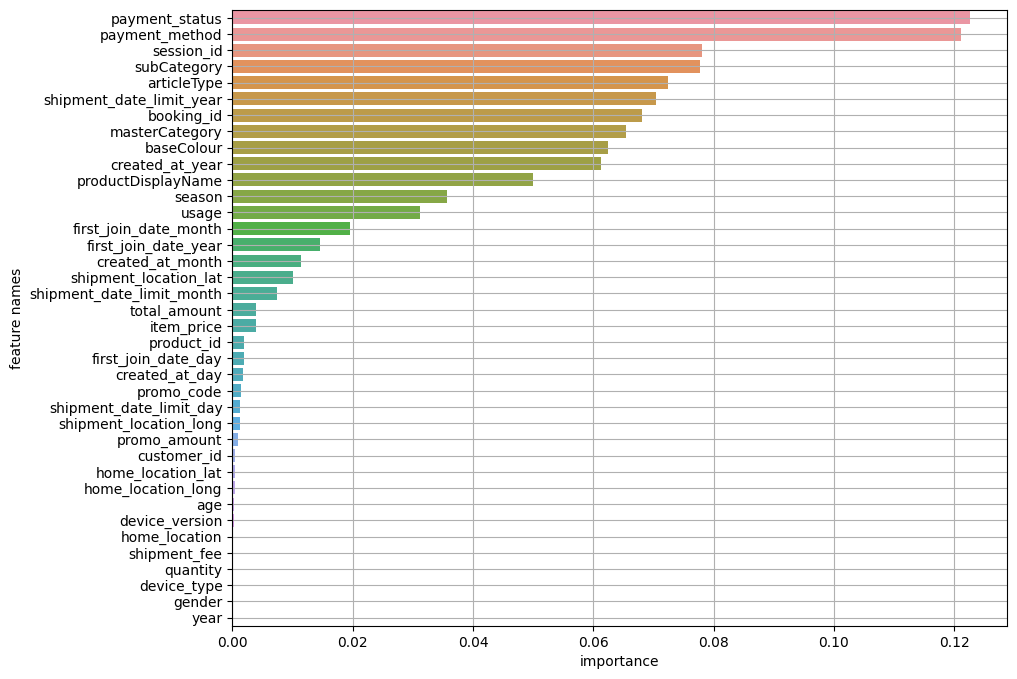

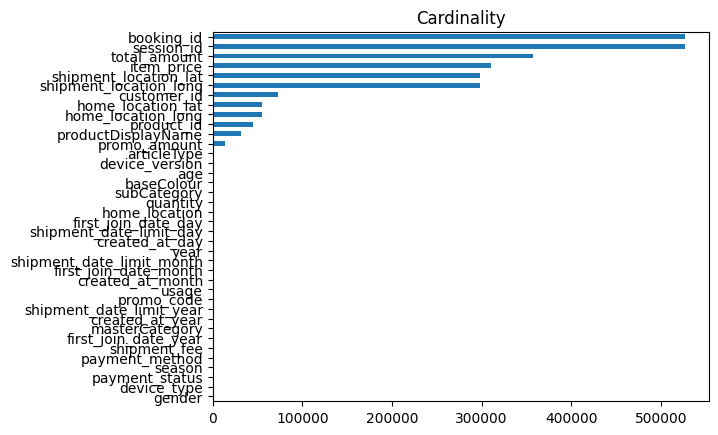

In [80]:
# randomforest 모델 추출
randomforest_model = RandomForest_pipe3.named_steps['randomforestclassifier']

# 특성 중요도 계산
importances = pd.Series(randomforest_model.feature_importances_, X_train.columns)

# 특성 중요도 시각화
fi = plot_feature_importance(randomforest_model.feature_importances_, list(X_train))
plt.show()

# 특성의 고유값 개수 시각화
X_train.nunique().sort_values().plot.barh()
plt.title("Cardinality")
plt.show()

* svm의 svc

In [ ]:
SVC_pipe = make_pipeline(
    OrdinalEncoder(),
    SimpleImputer(strategy="median"),
    SVC(
        C=1.0,
        kernel='rbf',
        degree=3,
        ),
)

In [ ]:
SVC_pipe.fit(X_train, y_train)

In [ ]:
summarize_results(SVC_pipe, X_test, y_test)

In [ ]:
# svc 모델 추출
svc_model = SVC_pipe.named_steps['svcclassifier']

# 특성 중요도 계산
importances = pd.Series(svc_model.feature_importances_, X_train.columns)

# 특성 중요도 시각화
fi = plot_feature_importance(svc_model.feature_importances_, list(X_train))
plt.show()

# 특성의 고유값 개수 시각화
X_train.nunique().sort_values().plot.barh()
plt.title("Cardinality")
plt.show()

데이터가 커서 모델 훈련이 끝나지 않아 탈락

* XGB

* StandardScaler 미사용

In [18]:
# 양성과 음성 개체수 불균형 해결
#imbalance_ratio = (len(y_train) - y_train.sum()) / y_train.sum()

test1_pipe = make_pipeline(
    OrdinalEncoder(),
    SimpleImputer(strategy="median"),
    #StandardScaler(),
    XGBClassifier(
        objective="binary:logistic",
        eval_metric="error",
        n_estimators=200,
        max_depth = 7,
        colsample_bytree = 1.0,
        min_child_weight = 2,
        random_state=42,
        n_jobs=-1,
        learning_rate=0.12,
        use_label_encoder=False,
        #scale_pos_weight = imbalance_ratio,
    ),
)

test1_pipe.fit(X_train, y_train)

Pipeline(steps=[('ordinalencoder',
                 OrdinalEncoder(cols=['gender', 'device_type', 'device_version',
                                      'home_location', 'booking_id',
                                      'session_id', 'payment_method',
                                      'payment_status', 'promo_code',
                                      'masterCategory', 'subCategory',
                                      'articleType', 'baseColour', 'season',
                                      'usage', 'productDisplayName'],
                                mapping=[{'col': 'gender',
                                          'data_type': dtype('O'),
                                          'mapping': M      1
F      2
NaN   -2
dt...
                               feature_types=None, gamma=None, gpu_id=None,
                               grow_policy=None, importance_type=None,
                               interaction_constraints=None, learning_rate=0.12,
                               max_bin=None, max_cat_threshold=None,
                               max_cat_to_onehot=None, max_delta_step=None,
                               max_depth=7, max_leaves=None, min_child_weight=2,
                               missing=nan, monotone_constraints=None,
                               n_estimators=200, n_jobs=-1,
                               num_parallel_tree=None, predictor=None,
                               random_state=42, ...))])

검증 정확도 0.97513
              precision    recall  f1-score   support

           0       0.97      1.00      0.99    228525
           1       0.98      0.63      0.77     15953

    accuracy                           0.98    244478
   macro avg       0.98      0.81      0.88    244478
weighted avg       0.98      0.98      0.97    244478

accuracy(정확도) is 0.97513
precision(정밀도) is 0.98468
recall(재현율) is 0.62860
f1점수(F1 score)is 0.76734


ROC-AUC: 0.97250


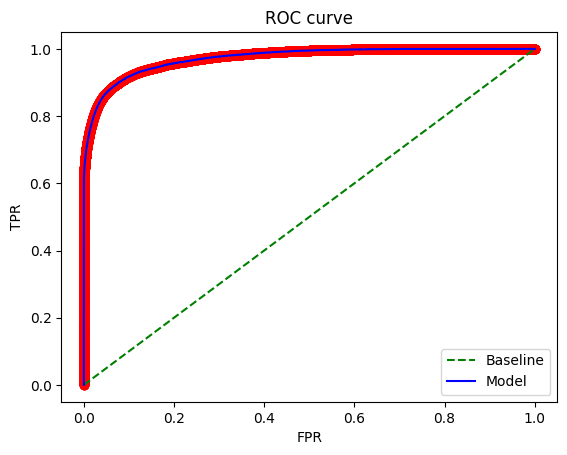

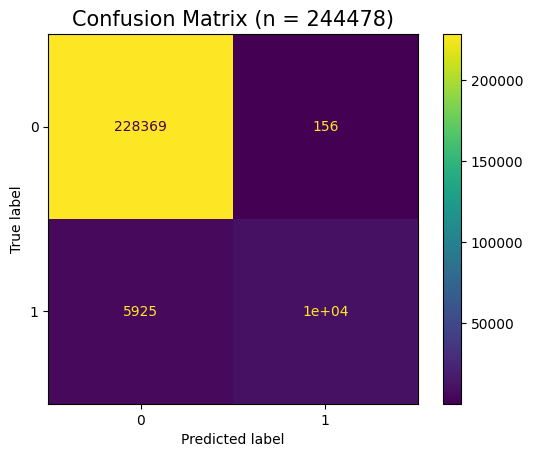

In [19]:
summarize_results(test1_pipe, X_val, y_val)

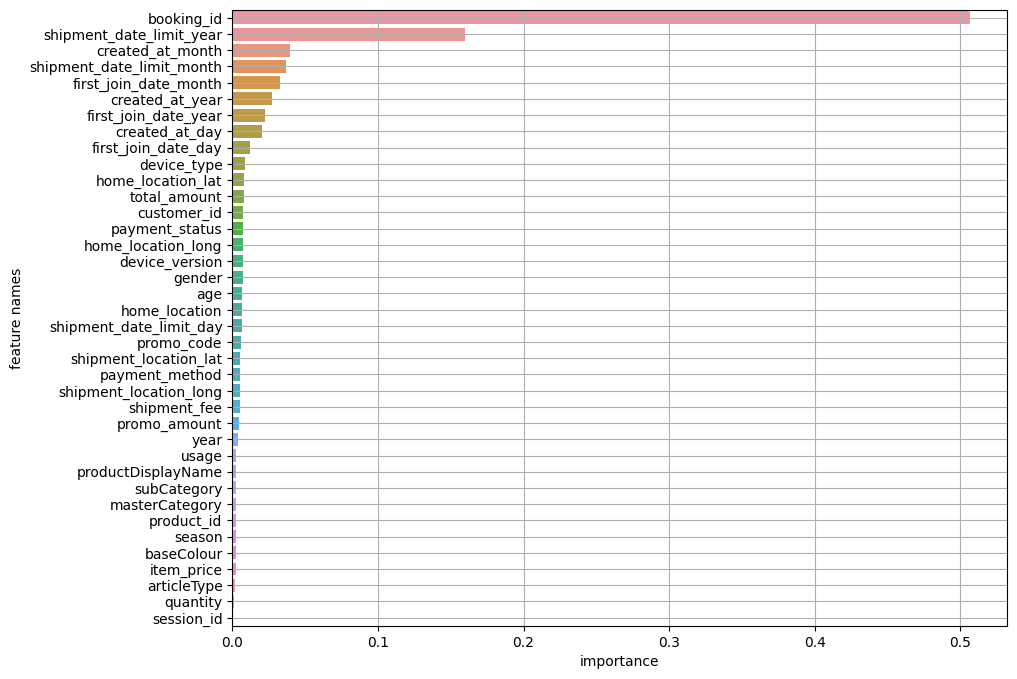

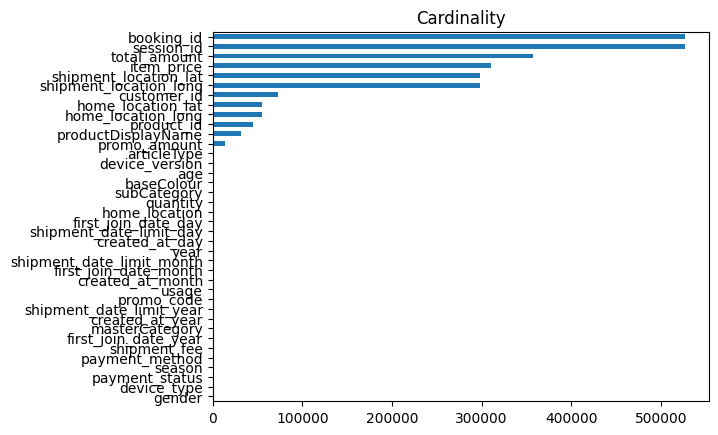

In [20]:
# XGBoost 모델 추출
xgb_model = test1_pipe.named_steps['xgbclassifier']

# 특성 중요도 계산
importances = pd.Series(xgb_model.feature_importances_, X_train.columns)

# 특성 중요도 시각화
fi = plot_feature_importance(xgb_model.feature_importances_, list(X_train))
plt.show()

# 특성의 고유값 개수 시각화
X_train.nunique().sort_values().plot.barh()
plt.title("Cardinality")
plt.show()

* StandardScaler 사용, scale_pos_weight 미사용

In [21]:
# 양성과 음성 개체수 불균형 해결
negative_sum = (y_train == 0).sum()
positive_sum = (y_train == 1).sum()
scale_pos_weight = negative_sum / positive_sum

test2_pipe = make_pipeline(
    OrdinalEncoder(),
    SimpleImputer(strategy="median"),
    StandardScaler(),
    XGBClassifier(
        objective="binary:logistic",
        eval_metric="error",
        n_estimators=200,
        max_depth = 7,
        colsample_bytree = 1.0,
        min_child_weight = 2,
        random_state=42,
        n_jobs=-1,
        learning_rate=0.12,
        use_label_encoder=False,
        #scale_pos_weight = scale_pos_weight,
    ),
)

test2_pipe.fit(X_train, y_train)

Pipeline(steps=[('ordinalencoder',
                 OrdinalEncoder(cols=['gender', 'device_type', 'device_version',
                                      'home_location', 'booking_id',
                                      'session_id', 'payment_method',
                                      'payment_status', 'promo_code',
                                      'masterCategory', 'subCategory',
                                      'articleType', 'baseColour', 'season',
                                      'usage', 'productDisplayName'],
                                mapping=[{'col': 'gender',
                                          'data_type': dtype('O'),
                                          'mapping': M      1
F      2
NaN   -2
dt...
                               feature_types=None, gamma=None, gpu_id=None,
                               grow_policy=None, importance_type=None,
                               interaction_constraints=None, learning_rate=0.12,
                               max_bin=None, max_cat_threshold=None,
                               max_cat_to_onehot=None, max_delta_step=None,
                               max_depth=7, max_leaves=None, min_child_weight=2,
                               missing=nan, monotone_constraints=None,
                               n_estimators=200, n_jobs=-1,
                               num_parallel_tree=None, predictor=None,
                               random_state=42, ...))])

검증 정확도 0.97506
              precision    recall  f1-score   support

           0       0.97      1.00      0.99    228525
           1       0.99      0.63      0.77     15953

    accuracy                           0.98    244478
   macro avg       0.98      0.81      0.88    244478
weighted avg       0.98      0.98      0.97    244478

accuracy(정확도) is 0.97506
precision(정밀도) is 0.98599
recall(재현율) is 0.62665
f1점수(F1 score)is 0.76629


ROC-AUC: 0.97223


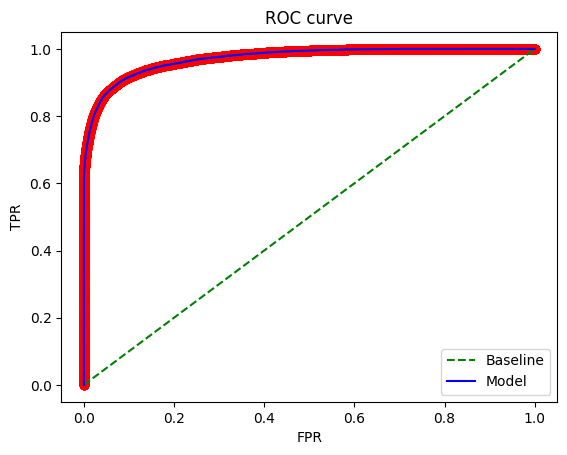

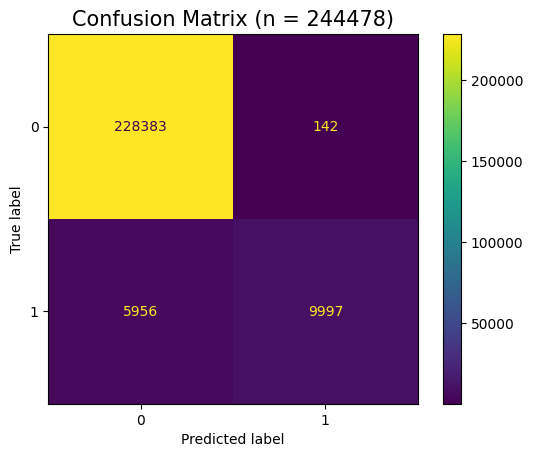

In [22]:
summarize_results(test2_pipe, X_val, y_val)

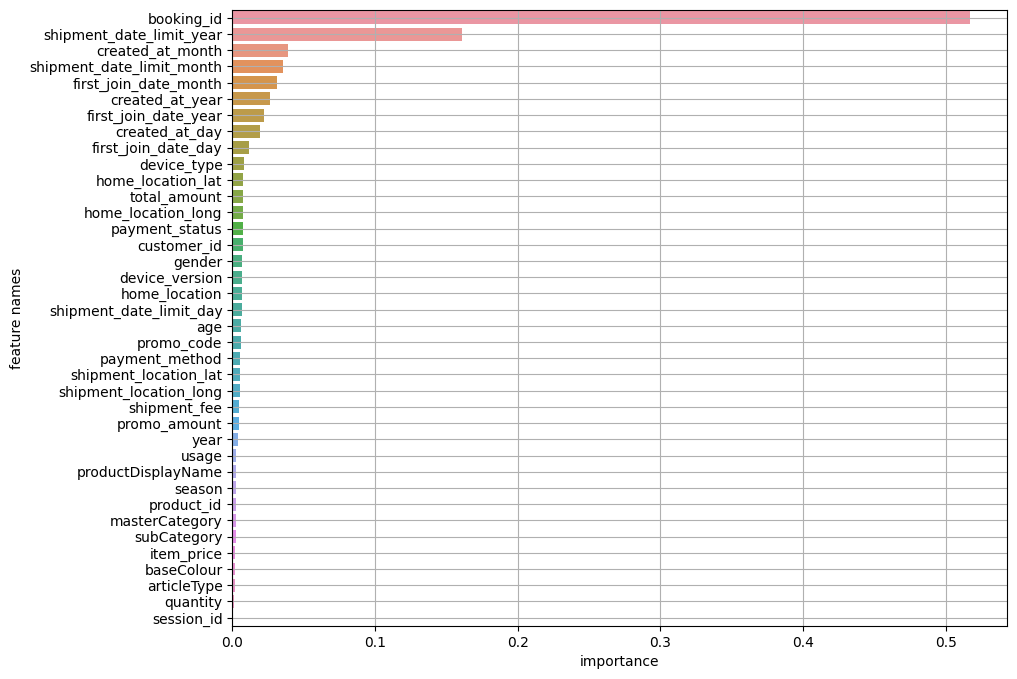

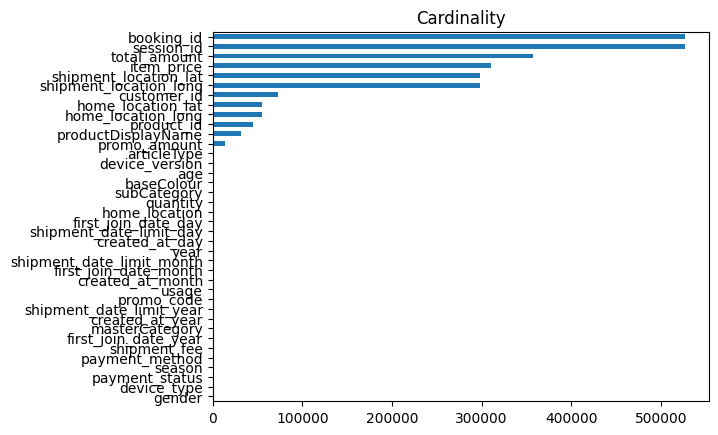

In [23]:
# XGBoost 모델 추출
xgb_model = test2_pipe.named_steps['xgbclassifier']

# 특성 중요도 계산
importances = pd.Series(xgb_model.feature_importances_, X_train.columns)

# 특성 중요도 시각화
fi = plot_feature_importance(xgb_model.feature_importances_, list(X_train))
plt.show()

# 특성의 고유값 개수 시각화
X_train.nunique().sort_values().plot.barh()
plt.title("Cardinality")
plt.show()

* StandardScaler 사용, scale_pos_weight 사용

In [64]:
# 양성과 음성 개체수 불균형 해결
negative_sum = (y_train == 0).sum()
positive_sum = (y_train == 1).sum()
scale_pos_weight = negative_sum / positive_sum

test3_pipe = make_pipeline(
    OrdinalEncoder(),
    SimpleImputer(strategy="median"),
    StandardScaler(),
    XGBClassifier(
        objective="binary:logistic",
        eval_metric="error",
        n_estimators=200,
        max_depth = 7,
        colsample_bytree = 1.0,
        min_child_weight = 2,
        random_state=42,
        n_jobs=-1,
        learning_rate=0.12,
        use_label_encoder=False,
        scale_pos_weight = scale_pos_weight,
    ),
)

test3_pipe.fit(X_train, y_train)

Pipeline(steps=[('ordinalencoder',
                 OrdinalEncoder(cols=['gender', 'device_type', 'device_version',
                                      'home_location', 'booking_id',
                                      'session_id', 'payment_method',
                                      'payment_status', 'promo_code',
                                      'masterCategory', 'subCategory',
                                      'articleType', 'season',
                                      'productDisplayName'],
                                mapping=[{'col': 'gender',
                                          'data_type': dtype('O'),
                                          'mapping': M      1
F      2
NaN   -2
dtype: int64},
                                         {'col': 'de...
                               feature_types=None, gamma=None, gpu_id=None,
                               grow_policy=None, importance_type=None,
                               interaction_constraints=None, learning_rate=0.12,
                               max_bin=None, max_cat_threshold=None,
                               max_cat_to_onehot=None, max_delta_step=None,
                               max_depth=7, max_leaves=None, min_child_weight=2,
                               missing=nan, monotone_constraints=None,
                               n_estimators=200, n_jobs=-1,
                               num_parallel_tree=None, predictor=None,
                               random_state=42, ...))])

검증 정확도 0.96004
              precision    recall  f1-score   support

           0       0.99      0.97      0.98    228525
           1       0.66      0.82      0.73     15953

    accuracy                           0.96    244478
   macro avg       0.82      0.89      0.85    244478
weighted avg       0.97      0.96      0.96    244478

accuracy(정확도) is 0.96004
precision(정밀도) is 0.65530
recall(재현율) is 0.81784
f1점수(F1 score)is 0.72760


ROC-AUC: 0.97034


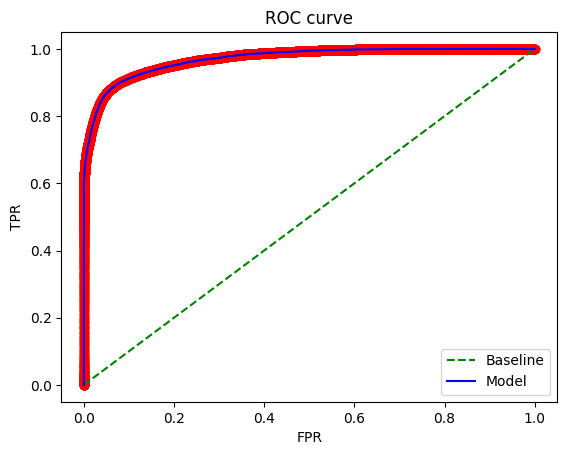

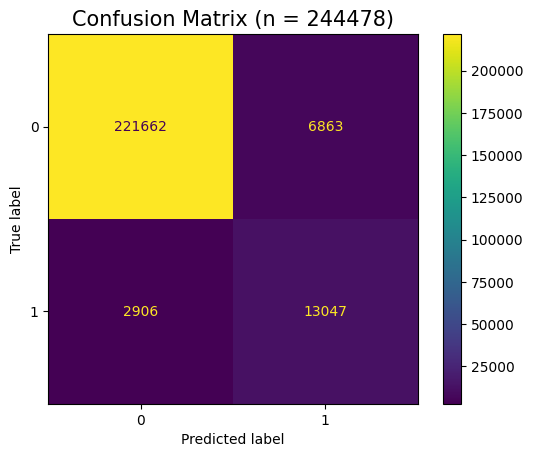

In [65]:
summarize_results(test3_pipe, X_val, y_val)

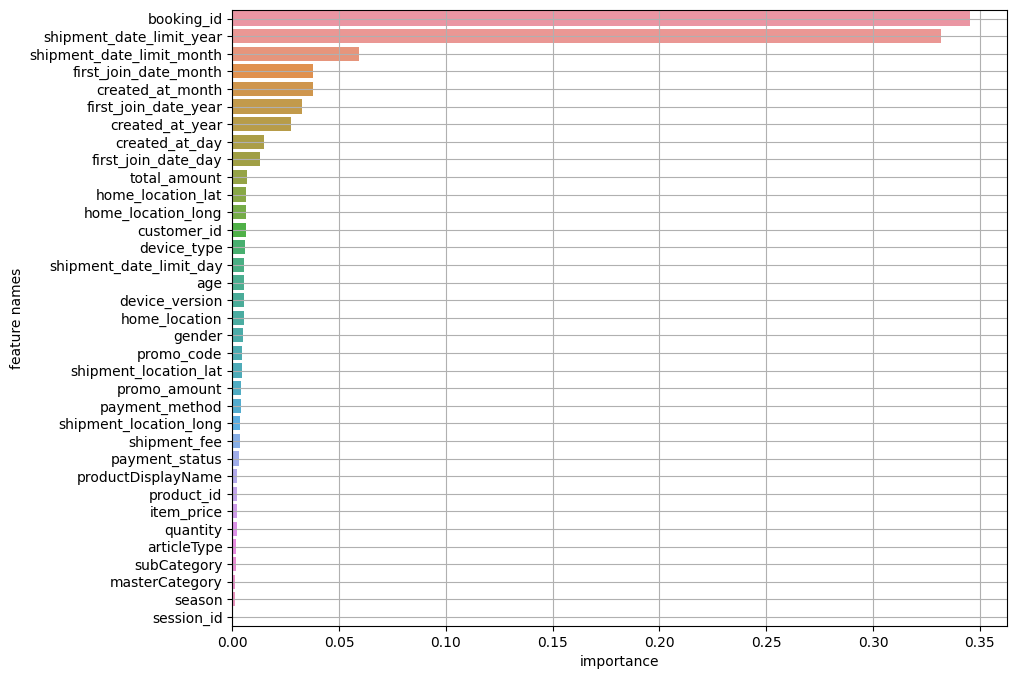

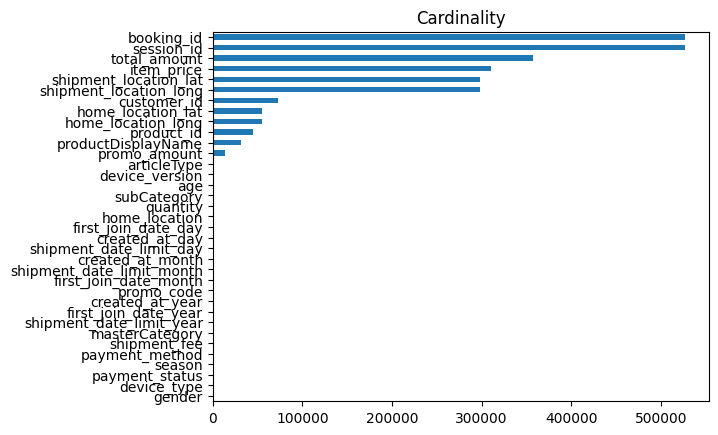

In [66]:
# XGBoost 모델 추출
xgb_model = test3_pipe.named_steps['xgbclassifier']

# 특성 중요도 계산
importances = pd.Series(xgb_model.feature_importances_, X_train.columns)

# 특성 중요도 시각화
fi = plot_feature_importance(xgb_model.feature_importances_, list(X_train))
plt.show()

# 특성의 고유값 개수 시각화
X_train.nunique().sort_values().plot.barh()
plt.title("Cardinality")
plt.show()

* 하이퍼 파라미터 튜닝

In [ ]:
# 양성과 음성 개체수 불균형 해결
negative_sum = (y_train == 0).sum()
positive_sum = (y_train == 1).sum()
scale_pos_weight = negative_sum / positive_sum

XGBClassifier_pipe = make_pipeline(
    OrdinalEncoder(),
    SimpleImputer(strategy="median"),
    StandardScaler(),
    XGBClassifier(
        objective="binary:logistic",
        eval_metric="error",
        n_estimators=200,
        random_state=42,
        n_jobs=-1,
        scale_pos_weight = scale_pos_weight,
    ),
)

In [ ]:
# 파라미터 분포 설정
from scipy.stats.distributions import uniform

params = {
    "xgbclassifier__max_depth": range(4, 7, 1),
    "xgbclassifier__min_child_weight": range(2, 8, 2),
    "xgbclassifier__learning_rate": [0.08, 0.1, 0.12],
    "xgbclassifier__colsample_bytree": uniform(
        loc=0.5, scale=0.5
    ),  # 0.5 ~ 1 사이의 uniform 분포로 범위를 지정해 줍니다.
}

In [ ]:
from sklearn.model_selection import RandomizedSearchCV

randomized_search = RandomizedSearchCV(
    XGBClassifier_pipe,
    param_distributions=params,
    scoring="roc_auc",
    n_iter=10,
    cv=5, # n_iter=10, cv=5이므로 50번 진행된다.
    verbose=5,
    random_state=42,
)
randomized_search.fit(X_val, y_val)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV 1/5] END xgbclassifier__colsample_bytree=0.6872700594236812, xgbclassifier__learning_rate=0.08, xgbclassifier__max_depth=6, xgbclassifier__min_child_weight=6;, score=0.952 total time= 2.1min
[CV 2/5] END xgbclassifier__colsample_bytree=0.6872700594236812, xgbclassifier__learning_rate=0.08, xgbclassifier__max_depth=6, xgbclassifier__min_child_weight=6;, score=0.955 total time= 1.9min
[CV 3/5] END xgbclassifier__colsample_bytree=0.6872700594236812, xgbclassifier__learning_rate=0.08, xgbclassifier__max_depth=6, xgbclassifier__min_child_weight=6;, score=0.952 total time= 2.0min
[CV 4/5] END xgbclassifier__colsample_bytree=0.6872700594236812, xgbclassifier__learning_rate=0.08, xgbclassifier__max_depth=6, xgbclassifier__min_child_weight=6;, score=0.950 total time= 1.9min
[CV 5/5] END xgbclassifier__colsample_bytree=0.6872700594236812, xgbclassifier__learning_rate=0.08, xgbclassifier__max_depth=6, xgbclassifier__min_child_weight

RandomizedSearchCV(cv=5,
                   estimator=Pipeline(steps=[('ordinalencoder',
                                              OrdinalEncoder()),
                                             ('simpleimputer',
                                              SimpleImputer(strategy='median')),
                                             ('standardscaler',
                                              StandardScaler()),
                                             ('xgbclassifier',
                                              XGBClassifier(base_score=None,
                                                            booster=None,
                                                            callbacks=None,
                                                            colsample_bylevel=None,
                                                            colsample_bynode=None,
                                                            colsample_bytree=None,
                                                            early_stopping_rounds=None,
                                                            enable_c...
                                                            predictor=None,
                                                            random_state=42, ...))]),
                   param_distributions={'xgbclassifier__colsample_bytree': <scipy.stats._distn_infrastructure.rv_continuous_frozen object at 0x7cc648f8db10>,
                                        'xgbclassifier__learning_rate': [0.08,
                                                                         0.1,
                                                                         0.12],
                                        'xgbclassifier__max_depth': range(4, 7),
                                        'xgbclassifier__min_child_weight': range(2, 8, 2)},
                   random_state=42, scoring='roc_auc', verbose=5)

In [ ]:
print("최적 하이퍼파라미터: ", randomized_search.best_params_)
print("최적 AUC: ", randomized_search.best_score_)

최적 하이퍼파라미터:  {'xgbclassifier__colsample_bytree': 0.8059264473611898, 'xgbclassifier__learning_rate': 0.1, 'xgbclassifier__max_depth': 6, 'xgbclassifier__min_child_weight': 4}
최적 AUC:  0.954377814555999


In [ ]:
pd.DataFrame(randomized_search.cv_results_).sort_values(by="rank_test_score").T

,7,2,1,9,8,0,3,4,6,5
mean_fit_time,134.451836,101.324935,140.611669,159.201784,98.362582,118.155163,112.077913,133.770445,85.568929,71.384535
std_fit_time,2.903629,1.366441,1.009872,2.332503,1.854631,3.767719,3.033052,1.965117,2.061689,1.172391
mean_score_time,0.798049,0.751584,0.695236,0.770464,0.784247,0.753117,0.821531,0.692576,0.826411,0.625632
std_score_time,0.171663,0.148871,0.043971,0.140652,0.171597,0.163137,0.240257,0.020494,0.17905,0.028882
param_xgbclassifier__colsample_bytree,0.805926,0.577997,0.889846,0.991615,0.545303,0.68727,0.800558,0.984955,0.762378,0.590912
param_xgbclassifier__learning_rate,0.1,0.12,0.08,0.08,0.1,0.08,0.12,0.1,0.08,0.08
param_xgbclassifier__max_depth,6,6,6,6,6,6,5,5,4,4
param_xgbclassifier__min_child_weight,4,2,4,2,6,6,2,4,6,4
params,{'xgbclassifier__colsample_bytree': 0.80592644...,{'xgbclassifier__colsample_bytree': 0.57799726...,{'xgbclassifier__colsample_bytree': 0.88984550...,{'xgbclassifier__colsample_bytree': 0.99161544...,{'xgbclassifier__colsample_bytree': 0.54530321...,{'xgbclassifier__colsample_bytree': 0.68727005...,{'xgbclassifier__colsample_bytree': 0.80055750...,{'xgbclassifier__colsample_bytree': 0.98495492...,{'xgbclassifier__colsample_bytree': 0.76237821...,{'xgbclassifier__colsample_bytree': 0.59091248...
split0_test_score,0.949138,0.953736,0.952503,0.953323,0.95026,0.951936,0.950613,0.948496,0.936635,0.936338


In [ ]:
# 양성과 음성 개체수 불균형 해결
negative_sum = (y_train == 0).sum()
positive_sum = (y_train == 1).sum()
scale_pos_weight = negative_sum / positive_sum

XGBClassifier_pipe = make_pipeline(
    OrdinalEncoder(),
    SimpleImputer(strategy="median"),
    StandardScaler(),
    XGBClassifier(
        objective="binary:logistic",
        eval_metric="error",
        n_estimators=200,
        random_state=42,
        n_jobs=-1,
        scale_pos_weight = scale_pos_weight,
    ),
)

In [ ]:
params = {
    "xgbclassifier__max_depth": [5, 6, 7],
    "xgbclassifier__learning_rate": [0.1, 0.12],
    "xgbclassifier__min_child_weight": [2, 4],
    "xgbclassifier__colsample_bytree": [0.6, 0.8],
}

In [ ]:
from sklearn.model_selection import GridSearchCV

grid_search = GridSearchCV(XGBClassifier_pipe, param_grid=params, scoring="roc_auc", cv=2, verbose=3)
grid_search.fit(X_train, y_train)

Fitting 2 folds for each of 24 candidates, totalling 48 fits
[CV 1/2] END xgbclassifier__colsample_bytree=0.6, xgbclassifier__learning_rate=0.1, xgbclassifier__max_depth=5, xgbclassifier__min_child_weight=2;, score=0.916 total time= 3.1min
[CV 2/2] END xgbclassifier__colsample_bytree=0.6, xgbclassifier__learning_rate=0.1, xgbclassifier__max_depth=5, xgbclassifier__min_child_weight=2;, score=0.949 total time= 2.9min
[CV 1/2] END xgbclassifier__colsample_bytree=0.6, xgbclassifier__learning_rate=0.1, xgbclassifier__max_depth=5, xgbclassifier__min_child_weight=4;, score=0.920 total time= 3.0min
[CV 2/2] END xgbclassifier__colsample_bytree=0.6, xgbclassifier__learning_rate=0.1, xgbclassifier__max_depth=5, xgbclassifier__min_child_weight=4;, score=0.954 total time= 2.9min
[CV 1/2] END xgbclassifier__colsample_bytree=0.6, xgbclassifier__learning_rate=0.1, xgbclassifier__max_depth=6, xgbclassifier__min_child_weight=2;, score=0.919 total time= 3.6min
[CV 2/2] END xgbclassifier__colsample_bytree

GridSearchCV(cv=2,
             estimator=Pipeline(steps=[('ordinalencoder', OrdinalEncoder()),
                                       ('simpleimputer',
                                        SimpleImputer(strategy='median')),
                                       ('standardscaler', StandardScaler()),
                                       ('xgbclassifier',
                                        XGBClassifier(base_score=None,
                                                      booster=None,
                                                      callbacks=None,
                                                      colsample_bylevel=None,
                                                      colsample_bynode=None,
                                                      colsample_bytree=None,
                                                      early_stopping_rounds=None,
                                                      enable_categor...
                                                      min_child_weight=None,
                                                      missing=nan,
                                                      monotone_constraints=None,
                                                      n_estimators=200,
                                                      n_jobs=-1,
                                                      num_parallel_tree=None,
                                                      predictor=None,
                                                      random_state=42, ...))]),
             param_grid={'xgbclassifier__colsample_bytree': [0.6, 0.8],
                         'xgbclassifier__learning_rate': [0.1, 0.12],
                         'xgbclassifier__max_depth': [5, 6, 7],
                         'xgbclassifier__min_child_weight': [2, 4]},
             scoring='roc_auc', verbose=3)

In [ ]:
print("최적 하이퍼파라미터: ", grid_search.best_params_)
print("최적 AUC: ", grid_search.best_score_)

최적 하이퍼파라미터:  {'xgbclassifier__colsample_bytree': 0.6, 'xgbclassifier__learning_rate': 0.12, 'xgbclassifier__max_depth': 7, 'xgbclassifier__min_child_weight': 4}
최적 AUC:  0.9493333670921287


In [81]:
# 양성과 음성 개체수 불균형 해결
negative_sum = (y_train == 0).sum()
positive_sum = (y_train == 1).sum()
scale_pos_weight = negative_sum / positive_sum

XGBClassifier_pipe = make_pipeline(
    OrdinalEncoder(),
    SimpleImputer(strategy="median"),
    StandardScaler(),
    XGBClassifier(
        objective="binary:logistic",
        eval_metric="error",
        n_estimators=200,
        max_depth = 7,
        colsample_bytree = 0.6,
        min_child_weight = 4,
        random_state=42,
        n_jobs=-1,
        learning_rate=0.12,
        use_label_encoder=False,
        scale_pos_weight = scale_pos_weight,
    ),
)

XGBClassifier_pipe.fit(X_train, y_train)

Pipeline(steps=[('ordinalencoder',
                 OrdinalEncoder(cols=['gender', 'device_type', 'device_version',
                                      'home_location', 'booking_id',
                                      'session_id', 'payment_method',
                                      'payment_status', 'promo_code',
                                      'masterCategory', 'subCategory',
                                      'articleType', 'baseColour', 'season',
                                      'usage', 'productDisplayName'],
                                mapping=[{'col': 'gender',
                                          'data_type': dtype('O'),
                                          'mapping': M      1
F      2
NaN   -2
dt...
                               feature_types=None, gamma=None, gpu_id=None,
                               grow_policy=None, importance_type=None,
                               interaction_constraints=None, learning_rate=0.12,
                               max_bin=None, max_cat_threshold=None,
                               max_cat_to_onehot=None, max_delta_step=None,
                               max_depth=7, max_leaves=None, min_child_weight=4,
                               missing=nan, monotone_constraints=None,
                               n_estimators=200, n_jobs=-1,
                               num_parallel_tree=None, predictor=None,
                               random_state=42, ...))])

검증 정확도 0.96007
              precision    recall  f1-score   support

           0       0.99      0.97      0.98    228525
           1       0.66      0.81      0.73     15953

    accuracy                           0.96    244478
   macro avg       0.82      0.89      0.85    244478
weighted avg       0.97      0.96      0.96    244478

accuracy(정확도) is 0.96007
precision(정밀도) is 0.65735
recall(재현율) is 0.81076
f1점수(F1 score)is 0.72604


ROC-AUC: 0.96706


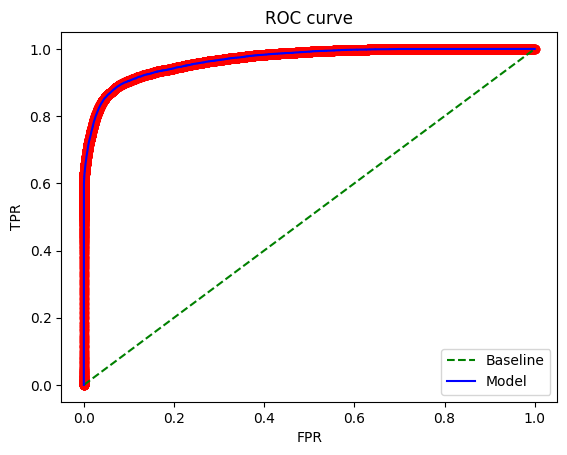

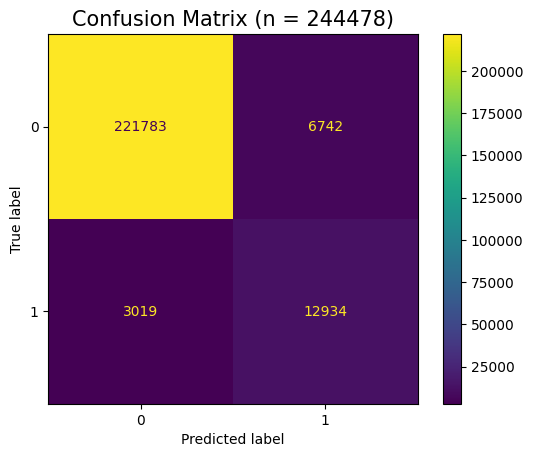

In [82]:
summarize_results(XGBClassifier_pipe, X_val, y_val)

In [86]:
import joblib

# 모델 저장
joblib.dump(XGBClassifier_pipe, 'XGBClassifier_pipe.pkl')

# 저장된 모델 불러오기
#loaded_model = joblib.load('model_filename.pkl')

# 불러온 모델로 예측 수행
#predictions = loaded_model.predict(X_test)

['XGBClassifier_pipe.pkl']

테스트 정확도 0.96002
              precision    recall  f1-score   support

           0       0.99      0.97      0.98    304699
           1       0.66      0.81      0.73     21271

    accuracy                           0.96    325970
   macro avg       0.82      0.89      0.85    325970
weighted avg       0.96      0.96      0.96    325970

accuracy(정확도) is 0.96002
precision(정밀도) is 0.65765
recall(재현율) is 0.80781
f1점수(F1 score)is 0.72504


ROC-AUC: 0.96673


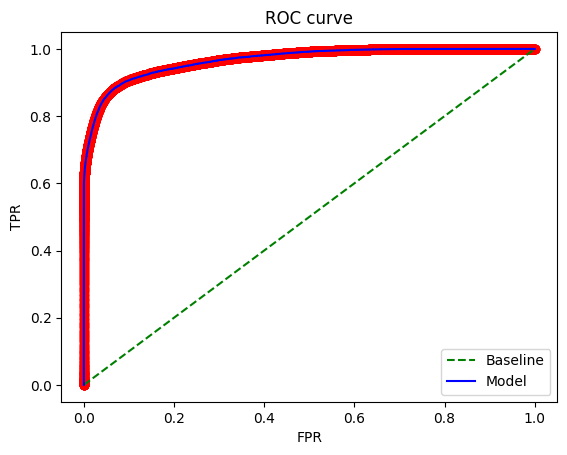

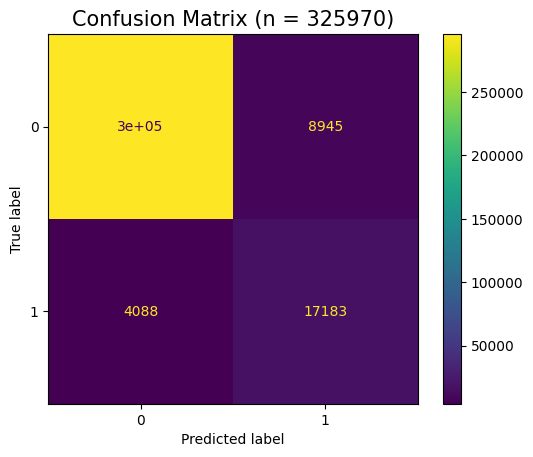

In [83]:
summarize_results(XGBClassifier_pipe, X_test, y_test)

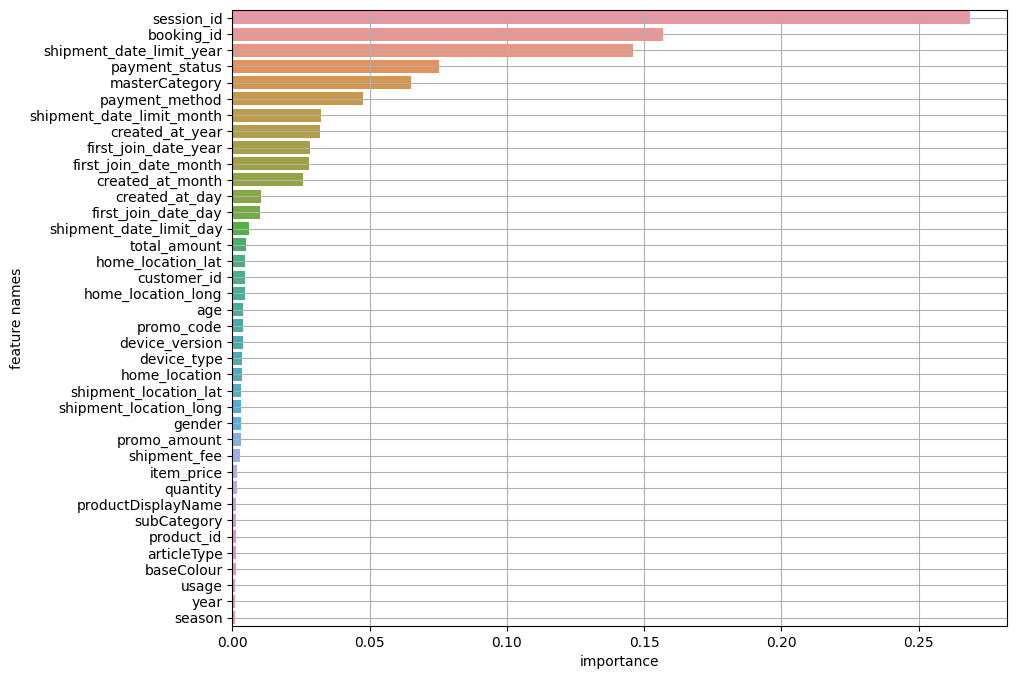

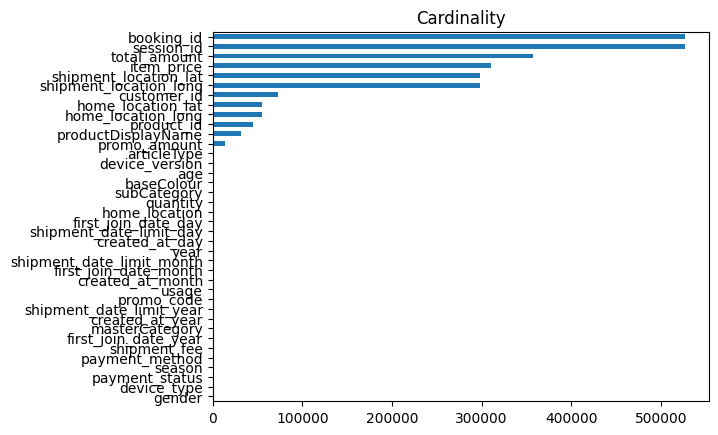

In [87]:
# XGBoost 모델 추출
xgb_model = XGBClassifier_pipe.named_steps['xgbclassifier']

# 특성 중요도 계산
importances = pd.Series(xgb_model.feature_importances_, X_train.columns)

# 특성 중요도 시각화
fi = plot_feature_importance(xgb_model.feature_importances_, list(X_train))
plt.show()

# 특성의 고유값 개수 시각화
X_train.nunique().sort_values().plot.barh()
plt.title("Cardinality")
plt.show()